<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Creating-df_rape" data-toc-modified-id="Creating-df_rape-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Creating df_rape</a></span></li><li><span><a href="#Data-Cleanup" data-toc-modified-id="Data-Cleanup-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Cleanup</a></span></li><li><span><a href="#Creation-of-datetime-column" data-toc-modified-id="Creation-of-datetime-column-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Creation of datetime column</a></span></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Visualization</a></span></li><li><span><a href="#Feature-Creation" data-toc-modified-id="Feature-Creation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Feature Creation</a></span></li><li><span><a href="#Setting-up-Random-Forest-Model" data-toc-modified-id="Setting-up-Random-Forest-Model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Setting up Random Forest Model</a></span></li><li><span><a href="#Ridge-Regression" data-toc-modified-id="Ridge-Regression-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Ridge Regression</a></span></li></ul></div>

In [ ]:
# Note: A 538 Article on Sexual Assault
# https://projects.fivethirtyeight.com/sexual-assault-victims/

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [2]:
# Data from https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i
df = pd.read_csv('NYPD_Complaint_Data_Historic.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Exploratory Data Analysis

In [3]:
df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"


In [4]:
df

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"
5,365661343,12/31/2015,23:18:00,12/31/2015,23:25:00,12/31/2015,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",...,71.0,FRONT OF,DRUG STORE,NaN,NaN,996149.0,181562.0,40.665023,-73.957111,"(40.665022689, -73.957110763)"
6,608231454,12/31/2015,23:15:00,NaN,NaN,12/31/2015,235,DANGEROUS DRUGS,511.0,"CONTROLLED SUBSTANCE, POSSESSI",...,7.0,OPPOSITE OF,STREET,NaN,NaN,987373.0,201662.0,40.720200,-73.988735,"(40.720199996, -73.988735082)"
7,265023856,12/31/2015,23:15:00,12/31/2015,23:15:00,12/31/2015,118,DANGEROUS WEAPONS,792.0,WEAPONS POSSESSION 1 & 2,...,46.0,FRONT OF,STREET,NaN,NaN,1009041.0,247401.0,40.845707,-73.910398,"(40.845707148, -73.910398033)"
8,989238731,12/31/2015,23:15:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,48.0,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,1014154.0,251416.0,40.856711,-73.891900,"(40.856711291, -73.891899956)"
9,415095955,12/31/2015,23:10:00,12/31/2015,23:10:00,12/31/2015,341,PETIT LARCENY,338.0,"LARCENY,PETIT FROM BUILDING,UN",...,19.0,INSIDE,DRUG STORE,NaN,NaN,994327.0,218211.0,40.765618,-73.963623,"(40.765617688, -73.96362342)"


In [5]:
df.dtypes

CMPLNT_NUM             int64
CMPLNT_FR_DT          object
CMPLNT_FR_TM          object
CMPLNT_TO_DT          object
CMPLNT_TO_TM          object
RPT_DT                object
KY_CD                  int64
OFNS_DESC             object
PD_CD                float64
PD_DESC               object
CRM_ATPT_CPTD_CD      object
LAW_CAT_CD            object
JURIS_DESC            object
BORO_NM               object
ADDR_PCT_CD          float64
LOC_OF_OCCUR_DESC     object
PREM_TYP_DESC         object
PARKS_NM              object
HADEVELOPT            object
X_COORD_CD           float64
Y_COORD_CD           float64
Latitude             float64
Longitude            float64
Lat_Lon               object
dtype: object

In [6]:
# Taking the subset of this data, the 16673 rows specifically about rape
df['OFNS_DESC'].value_counts()

PETIT LARCENY                           987326
HARRASSMENT 2                           736479
ASSAULT 3 & RELATED OFFENSES            625624
CRIMINAL MISCHIEF & RELATED OF          603977
GRAND LARCENY                           516544
DANGEROUS DRUGS                         392992
OFF. AGNST PUB ORD SENSBLTY &           327716
ROBBERY                                 228220
FELONY ASSAULT                          224921
BURGLARY                                216439
MISCELLANEOUS PENAL LAW                 145888
DANGEROUS WEAPONS                       143395
OFFENSES AGAINST PUBLIC ADMINI          117062
GRAND LARCENY OF MOTOR VEHICLE          114071
INTOXICATED & IMPAIRED DRIVING           85349
CRIMINAL TRESPASS                        74083
VEHICLE AND TRAFFIC LAWS                 72173
SEX CRIMES                               68020
THEFT-FRAUD                              66184
FORGERY                                  61024
FRAUDS                                   38308
POSSESSION OF

In [ ]:
# CHECK NULLS

In [ ]:
# Non-meaningful columns that need to be deleted 
# KY_CD: Meaningless- identical in subset of rape data
# PD_DESC: identical to PD_CD
# LAW_CAT_CD
# JURIS_DESC
# LOC_OF_OCCUR_DESC
# PARKS_NM
# HADEVELOPT
# X_COORD_CD
# Y_COORD_CD
# Latitude
# Longitude
# Lat_Lon

In [7]:
df = df.drop(['KY_CD','PD_DESC','LAW_CAT_CD','JURIS_DESC','LOC_OF_OCCUR_DESC','PARKS_NM','HADEVELOPT','X_COORD_CD','Y_COORD_CD','Latitude','Longitude','Lat_Lon'], axis = 1)

# Creating df_rape

In [8]:
df_rape = df.loc[df['OFNS_DESC'] == 'RAPE']

In [9]:
df_rape.shape

(16673, 12)

In [10]:
df_rape.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,OFNS_DESC,PD_CD,CRM_ATPT_CPTD_CD,BORO_NM,ADDR_PCT_CD,PREM_TYP_DESC
21,340513307,04/06/2015,12:00:00,04/10/2015,18:00:00,12/21/2015,RAPE,155.0,COMPLETED,QUEENS,110.0,OTHER
252,198273659,12/01/2009,10:00:00,01/01/2010,10:00:00,12/07/2015,RAPE,157.0,COMPLETED,BROOKLYN,66.0,RESIDENCE - APT. HOUSE
821,591506102,12/30/2015,18:00:00,12/30/2015,23:00:00,12/31/2015,RAPE,157.0,COMPLETED,QUEENS,102.0,RESIDENCE-HOUSE
1079,283109223,08/01/2015,00:01:00,12/30/2015,22:25:00,12/31/2015,RAPE,153.0,COMPLETED,MANHATTAN,25.0,RESIDENCE - APT. HOUSE
1754,361697946,12/30/2015,03:04:00,12/30/2015,05:19:00,12/30/2015,RAPE,157.0,COMPLETED,MANHATTAN,20.0,HOTEL/MOTEL


In [11]:
# The outcome variable, rape completed vs attempted
df_rape['CRM_ATPT_CPTD_CD'].value_counts()

COMPLETED    14843
ATTEMPTED     1830
Name: CRM_ATPT_CPTD_CD, dtype: int64

# Data Cleanup

In [14]:
df_rape.isnull().sum()

CMPLNT_NUM             0
CMPLNT_FR_DT           1
CMPLNT_FR_TM           0
CMPLNT_TO_DT        3604
CMPLNT_TO_TM        3598
RPT_DT                 0
OFNS_DESC              0
PD_CD                  0
CRM_ATPT_CPTD_CD       0
BORO_NM                4
ADDR_PCT_CD            4
PREM_TYP_DESC         63
dtype: int64

In [ ]:
# Drop the nas now: thresh = thresh=7

In [16]:
df_nonas = df_rape.dropna(thresh = 10)

In [17]:
df_nonas.isnull().sum()

CMPLNT_NUM             0
CMPLNT_FR_DT           1
CMPLNT_FR_TM           0
CMPLNT_TO_DT        3591
CMPLNT_TO_TM        3585
RPT_DT                 0
OFNS_DESC              0
PD_CD                  0
CRM_ATPT_CPTD_CD       0
BORO_NM                0
ADDR_PCT_CD            0
PREM_TYP_DESC         46
dtype: int64

In [ ]:
# Any 24:00:00 times need to be cleaned up so Timestamps can be made

In [18]:
df_rape[df_rape['PREM_TYP_DESC'].isnull()]

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,OFNS_DESC,PD_CD,CRM_ATPT_CPTD_CD,BORO_NM,ADDR_PCT_CD,PREM_TYP_DESC
101688,383924249,10/11/2015,11:00:00,10/11/2015,11:30:00,10/14/2015,RAPE,153.0,COMPLETED,MANHATTAN,9.0,NaN
137159,248192052,09/16/2015,22:00:00,09/17/2015,04:00:00,09/18/2015,RAPE,159.0,ATTEMPTED,BRONX,48.0,NaN
242647,942457396,07/06/2015,19:20:00,07/06/2015,19:25:00,07/06/2015,RAPE,159.0,ATTEMPTED,MANHATTAN,19.0,NaN
341293,511817239,04/25/2015,17:00:00,04/25/2015,17:30:00,04/26/2015,RAPE,157.0,COMPLETED,BRONX,50.0,NaN
365527,328876526,03/19/2015,23:00:00,03/20/2015,03:00:00,04/08/2015,RAPE,153.0,COMPLETED,MANHATTAN,20.0,NaN
528628,116568192,11/18/2014,10:00:00,11/18/2014,11:00:00,11/18/2014,RAPE,157.0,COMPLETED,BRONX,42.0,NaN
589716,187234861,10/05/2014,00:45:00,10/05/2014,01:00:00,10/05/2014,RAPE,157.0,COMPLETED,MANHATTAN,26.0,NaN
745722,927672160,02/10/2013,02:30:00,NaN,NaN,06/19/2014,RAPE,159.0,ATTEMPTED,MANHATTAN,26.0,NaN
911884,999065785,02/12/2014,21:00:00,02/12/2014,22:00:00,02/17/2014,RAPE,159.0,ATTEMPTED,MANHATTAN,6.0,NaN
919947,977952253,12/15/2012,00:01:00,12/15/2012,02:00:00,02/10/2014,RAPE,157.0,COMPLETED,BROOKLYN,84.0,NaN


In [19]:
(df_rape['CMPLNT_FR_TM'] == '24:00:00').value_counts(sort = True)

False    16654
True        19
Name: CMPLNT_FR_TM, dtype: int64

In [20]:
(df_rape['CMPLNT_TO_TM'] == '24:00:00').value_counts(sort = True)

False    16614
True        59
Name: CMPLNT_TO_TM, dtype: int64

In [21]:
df_rape.loc[df_rape['CMPLNT_FR_DT'].isna()]

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,OFNS_DESC,PD_CD,CRM_ATPT_CPTD_CD,BORO_NM,ADDR_PCT_CD,PREM_TYP_DESC
1008394,155379861,NaN,06:00:00,12/02/2013,06:30:00,12/02/2013,RAPE,159.0,ATTEMPTED,BROOKLYN,90.0,RESIDENCE - APT. HOUSE


In [22]:
# In situations where the From Date is Null, change to to date

In [23]:
# Get rid of a troublesome na
df_rape.loc[df_rape['CMPLNT_FR_DT'].isna(), 'CMPLNT_FR_DT'] = df_rape.loc[df_rape['CMPLNT_FR_DT'].isna(), 'CMPLNT_TO_DT']

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [24]:
df_rape.loc[df_rape['CMPLNT_FR_DT'].isna()]

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,OFNS_DESC,PD_CD,CRM_ATPT_CPTD_CD,BORO_NM,ADDR_PCT_CD,PREM_TYP_DESC


In [25]:
# Get rid of troublesome 24:00:00 values in 'From Time'
df_rape.loc[df_rape['CMPLNT_FR_TM'] == '24:00:00', 'CMPLNT_FR_TM'] = '23:59:59'

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [26]:
# Get rid of troublesome 24:00:00 values in 'To Time'
df_rape.loc[df_rape['CMPLNT_TO_TM'] == '24:00:00', 'CMPLNT_TO_TM'] = '23:59:59'

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [27]:
# Check cells
df_rape.sort_values(by='CMPLNT_FR_TM', ascending=False)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,OFNS_DESC,PD_CD,CRM_ATPT_CPTD_CD,BORO_NM,ADDR_PCT_CD,PREM_TYP_DESC
3466499,829061498,06/01/2002,23:59:59,01/06/2009,15:35:00,01/21/2009,RAPE,157.0,COMPLETED,STATEN ISLAND,122.0,RESIDENCE-HOUSE
3894448,268184195,03/30/2008,23:59:59,NaN,NaN,03/31/2008,RAPE,157.0,COMPLETED,MANHATTAN,34.0,RESIDENCE - PUBLIC HOUSING
3659304,674449658,11/28/2007,23:59:59,NaN,NaN,09/05/2008,RAPE,153.0,COMPLETED,STATEN ISLAND,120.0,RESIDENCE - APT. HOUSE
3838102,937145860,10/12/2007,23:59:59,NaN,NaN,05/09/2008,RAPE,157.0,COMPLETED,MANHATTAN,6.0,RESIDENCE - APT. HOUSE
3379603,282308644,01/01/2004,23:59:59,12/31/2004,23:59:00,03/26/2009,RAPE,157.0,COMPLETED,BROOKLYN,67.0,RESIDENCE-HOUSE
3601184,357409136,01/01/2007,23:59:59,10/13/2008,23:59:59,10/14/2008,RAPE,157.0,COMPLETED,MANHATTAN,34.0,RESIDENCE - APT. HOUSE
3441876,965083518,11/01/2008,23:59:59,11/15/2008,23:59:59,02/09/2009,RAPE,157.0,COMPLETED,QUEENS,105.0,RESIDENCE - APT. HOUSE
3179713,678406708,04/01/2004,23:59:59,06/01/2005,23:59:00,08/12/2009,RAPE,157.0,COMPLETED,QUEENS,113.0,RESIDENCE-HOUSE
4153011,833029701,08/29/2007,23:59:59,NaN,NaN,10/03/2007,RAPE,157.0,COMPLETED,BRONX,47.0,RESIDENCE - PUBLIC HOUSING
4011256,266934295,10/31/2007,23:59:59,NaN,NaN,01/09/2008,RAPE,157.0,COMPLETED,BROOKLYN,70.0,RESIDENCE - APT. HOUSE


In [28]:
df_rape.sort_values(by='CMPLNT_TO_TM', ascending=False)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,OFNS_DESC,PD_CD,CRM_ATPT_CPTD_CD,BORO_NM,ADDR_PCT_CD,PREM_TYP_DESC
3841350,618252524,05/24/2006,09:00:00,01/01/2008,23:59:59,05/07/2008,RAPE,155.0,COMPLETED,BRONX,48.0,RESIDENCE - APT. HOUSE
3439084,763217678,09/01/2008,23:59:59,01/12/2009,23:59:59,02/11/2009,RAPE,153.0,COMPLETED,STATEN ISLAND,120.0,RESIDENCE-HOUSE
3440507,203276462,01/10/2009,00:01:00,01/10/2009,23:59:59,02/10/2009,RAPE,153.0,COMPLETED,QUEENS,115.0,RESIDENCE-HOUSE
3656480,606699261,01/01/2005,15:00:00,04/30/2008,23:59:59,09/07/2008,RAPE,157.0,COMPLETED,BRONX,50.0,RESIDENCE - APT. HOUSE
4201880,155768460,07/07/2007,20:00:00,07/08/2007,23:59:59,09/02/2007,RAPE,155.0,COMPLETED,BRONX,47.0,RESIDENCE-HOUSE
3441876,965083518,11/01/2008,23:59:59,11/15/2008,23:59:59,02/09/2009,RAPE,157.0,COMPLETED,QUEENS,105.0,RESIDENCE - APT. HOUSE
4046403,576727230,12/13/2007,18:00:00,12/14/2007,23:59:59,12/14/2007,RAPE,153.0,COMPLETED,BROOKLYN,83.0,RESIDENCE - APT. HOUSE
4313564,570578651,07/01/2006,10:00:00,04/01/2007,23:59:59,06/21/2007,RAPE,153.0,COMPLETED,STATEN ISLAND,122.0,RESIDENCE-HOUSE
3445603,597213125,05/01/2008,00:01:00,12/20/2008,23:59:59,02/06/2009,RAPE,153.0,COMPLETED,MANHATTAN,23.0,RESIDENCE - PUBLIC HOUSING
3887411,375676496,06/01/2003,15:00:00,06/30/2004,23:59:59,04/05/2008,RAPE,157.0,COMPLETED,BRONX,44.0,RESIDENCE - APT. HOUSE


In [29]:
# Get rid of troublesome '1016' date value
format_check = df_rape.CMPLNT_FR_DT.str.extract('^(\d{2})/(\d{2})/(\d{4})')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [30]:
# Check the rest of the years
format_check[2].unique()

array(['2015', '2009', '2012', '2008', '2014', '2006', '2013', '2010',
       '2002', '1993', '2011', '2007', '2003', '2000', '2005', '2004',
       '2001', '1999', '1975', '1996', '1997', '1992', '1998', '1990',
       '1994', '1988', '1995', '1989', '1978', '1991', '2016', '1984',
       '1980', '1986', '1016', '1983', '2017', '1973', '1968', '1967',
       '1976', '1981', '1987', '1977'], dtype=object)

In [31]:
# Year 1016 must be deleted for conversion
df_rape['CMPLNT_FR_DT'] = df_rape['CMPLNT_FR_DT'].str.replace('1016','2016')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
# Drop rows where ADDR_PCT_CD is null, they're troublesome later


In [33]:
df_rape.isnull().sum()

CMPLNT_NUM             0
CMPLNT_FR_DT           0
CMPLNT_FR_TM           0
CMPLNT_TO_DT        3604
CMPLNT_TO_TM        3598
RPT_DT                 0
OFNS_DESC              0
PD_CD                  0
CRM_ATPT_CPTD_CD       0
BORO_NM                4
ADDR_PCT_CD            4
PREM_TYP_DESC         63
dtype: int64

In [34]:
df_rape

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,OFNS_DESC,PD_CD,CRM_ATPT_CPTD_CD,BORO_NM,ADDR_PCT_CD,PREM_TYP_DESC
21,340513307,04/06/2015,12:00:00,04/10/2015,18:00:00,12/21/2015,RAPE,155.0,COMPLETED,QUEENS,110.0,OTHER
252,198273659,12/01/2009,10:00:00,01/01/2010,10:00:00,12/07/2015,RAPE,157.0,COMPLETED,BROOKLYN,66.0,RESIDENCE - APT. HOUSE
821,591506102,12/30/2015,18:00:00,12/30/2015,23:00:00,12/31/2015,RAPE,157.0,COMPLETED,QUEENS,102.0,RESIDENCE-HOUSE
1079,283109223,08/01/2015,00:01:00,12/30/2015,22:25:00,12/31/2015,RAPE,153.0,COMPLETED,MANHATTAN,25.0,RESIDENCE - APT. HOUSE
1754,361697946,12/30/2015,03:04:00,12/30/2015,05:19:00,12/30/2015,RAPE,157.0,COMPLETED,MANHATTAN,20.0,HOTEL/MOTEL
2086,449252466,12/28/2015,18:00:00,12/28/2015,19:00:00,12/30/2015,RAPE,157.0,COMPLETED,BROOKLYN,70.0,RESIDENCE - APT. HOUSE
2269,841076951,11/27/2015,20:00:00,NaN,NaN,12/30/2015,RAPE,153.0,COMPLETED,MANHATTAN,26.0,RESIDENCE - PUBLIC HOUSING
2716,462568423,12/29/2015,15:30:00,NaN,NaN,12/29/2015,RAPE,159.0,ATTEMPTED,BRONX,41.0,RESIDENCE - APT. HOUSE
3199,632341905,12/28/2015,20:00:00,12/28/2015,20:30:00,12/29/2015,RAPE,157.0,COMPLETED,QUEENS,109.0,RESIDENCE - APT. HOUSE
3346,706551270,12/26/2015,02:30:00,12/26/2015,06:00:00,12/29/2015,RAPE,155.0,COMPLETED,MANHATTAN,19.0,RESIDENCE - APT. HOUSE


In [35]:
df_rape.isnull().sum()

CMPLNT_NUM             0
CMPLNT_FR_DT           0
CMPLNT_FR_TM           0
CMPLNT_TO_DT        3604
CMPLNT_TO_TM        3598
RPT_DT                 0
OFNS_DESC              0
PD_CD                  0
CRM_ATPT_CPTD_CD       0
BORO_NM                4
ADDR_PCT_CD            4
PREM_TYP_DESC         63
dtype: int64

In [36]:
df_rape.shape

(16673, 12)

In [37]:
# Drop rows where PREM_TYP_DESC or ADDR_PCT_CD is null

In [38]:
df_rape = df_rape.dropna(subset=['PREM_TYP_DESC']) 

In [39]:
df_rape.shape

(16610, 12)

# Creation of datetime column

In [40]:
# CMPLNT_datetime_series_FR and CMPLNT_datetime_series_TO are 
# concatenated strings

In [41]:
CMPLNT_datetime_series_FR = df_rape['CMPLNT_FR_DT'] + ' ' + df_rape['CMPLNT_FR_TM']

In [42]:
CMPLNT_datetime_series_TO = df_rape['CMPLNT_TO_DT'] + ' ' + df_rape['CMPLNT_TO_TM']

In [43]:
# Two strings to convers to Timestamp
print(type(CMPLNT_datetime_series_FR[21]), type(CMPLNT_datetime_series_TO[21]))

<class 'str'> <class 'str'>


In [44]:
pd.to_datetime(CMPLNT_datetime_series_FR, infer_datetime_format=True)

21        2015-04-06 12:00:00
252       2009-12-01 10:00:00
821       2015-12-30 18:00:00
1079      2015-08-01 00:01:00
1754      2015-12-30 03:04:00
2086      2015-12-28 18:00:00
2269      2015-11-27 20:00:00
2716      2015-12-29 15:30:00
3199      2015-12-28 20:00:00
3346      2015-12-26 02:30:00
4024      2015-12-27 21:30:00
4281      2015-12-28 02:40:00
5617      2015-12-27 01:00:00
5674      2015-12-26 23:30:00
5686      2015-12-26 23:00:00
5879      2015-12-25 06:00:00
5885      2015-12-25 02:00:00
5991      2015-11-03 12:00:00
6015      2015-07-20 12:00:00
6576      2015-12-26 09:25:00
6634      2015-12-26 05:00:00
7601      2015-12-25 04:00:00
7602      2015-12-25 02:30:00
7853      2015-12-24 17:30:00
7874      2015-10-12 00:01:00
8118      2015-12-24 18:00:00
8565      2015-12-24 03:25:00
9134      2015-11-19 23:00:00
10186     2015-10-01 12:00:00
10201     2015-06-03 01:00:00
                  ...        
6040310   2017-01-01 00:01:00
6040425   2017-01-07 21:00:00
6040838   

In [45]:
pd.to_datetime(CMPLNT_datetime_series_TO, infer_datetime_format=True)

21        2015-04-10 18:00:00
252       2010-01-01 10:00:00
821       2015-12-30 23:00:00
1079      2015-12-30 22:25:00
1754      2015-12-30 05:19:00
2086      2015-12-28 19:00:00
2269                      NaT
2716                      NaT
3199      2015-12-28 20:30:00
3346      2015-12-26 06:00:00
4024      2015-12-27 22:00:00
4281      2015-12-28 03:00:00
5617      2015-12-27 01:20:00
5674                      NaT
5686      2015-12-27 06:40:00
5879      2015-12-25 09:00:00
5885      2015-12-25 03:00:00
5991      2015-11-03 13:00:00
6015                      NaT
6576      2015-12-26 09:30:00
6634                      NaT
7601      2015-12-25 04:30:00
7602      2015-12-25 06:00:00
7853      2015-12-25 07:30:00
7874      2015-10-12 23:59:00
8118      2015-12-24 18:30:00
8565      2015-12-24 03:40:00
9134      2015-11-19 23:59:00
10186     2015-10-31 12:00:00
10201     2015-06-03 02:00:00
                  ...        
6040310   2017-01-05 23:59:00
6040425                   NaT
6040838   

In [46]:
df_rape['CMPLNT_FR_DATETIME'] = CMPLNT_datetime_series_FR

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
df_rape['CMPLNT_TO_DATETIME'] = CMPLNT_datetime_series_TO

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
df_rape

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,OFNS_DESC,PD_CD,CRM_ATPT_CPTD_CD,BORO_NM,ADDR_PCT_CD,PREM_TYP_DESC,CMPLNT_FR_DATETIME,CMPLNT_TO_DATETIME
21,340513307,04/06/2015,12:00:00,04/10/2015,18:00:00,12/21/2015,RAPE,155.0,COMPLETED,QUEENS,110.0,OTHER,04/06/2015 12:00:00,04/10/2015 18:00:00
252,198273659,12/01/2009,10:00:00,01/01/2010,10:00:00,12/07/2015,RAPE,157.0,COMPLETED,BROOKLYN,66.0,RESIDENCE - APT. HOUSE,12/01/2009 10:00:00,01/01/2010 10:00:00
821,591506102,12/30/2015,18:00:00,12/30/2015,23:00:00,12/31/2015,RAPE,157.0,COMPLETED,QUEENS,102.0,RESIDENCE-HOUSE,12/30/2015 18:00:00,12/30/2015 23:00:00
1079,283109223,08/01/2015,00:01:00,12/30/2015,22:25:00,12/31/2015,RAPE,153.0,COMPLETED,MANHATTAN,25.0,RESIDENCE - APT. HOUSE,08/01/2015 00:01:00,12/30/2015 22:25:00
1754,361697946,12/30/2015,03:04:00,12/30/2015,05:19:00,12/30/2015,RAPE,157.0,COMPLETED,MANHATTAN,20.0,HOTEL/MOTEL,12/30/2015 03:04:00,12/30/2015 05:19:00
2086,449252466,12/28/2015,18:00:00,12/28/2015,19:00:00,12/30/2015,RAPE,157.0,COMPLETED,BROOKLYN,70.0,RESIDENCE - APT. HOUSE,12/28/2015 18:00:00,12/28/2015 19:00:00
2269,841076951,11/27/2015,20:00:00,NaN,NaN,12/30/2015,RAPE,153.0,COMPLETED,MANHATTAN,26.0,RESIDENCE - PUBLIC HOUSING,11/27/2015 20:00:00,NaN
2716,462568423,12/29/2015,15:30:00,NaN,NaN,12/29/2015,RAPE,159.0,ATTEMPTED,BRONX,41.0,RESIDENCE - APT. HOUSE,12/29/2015 15:30:00,NaN
3199,632341905,12/28/2015,20:00:00,12/28/2015,20:30:00,12/29/2015,RAPE,157.0,COMPLETED,QUEENS,109.0,RESIDENCE - APT. HOUSE,12/28/2015 20:00:00,12/28/2015 20:30:00
3346,706551270,12/26/2015,02:30:00,12/26/2015,06:00:00,12/29/2015,RAPE,155.0,COMPLETED,MANHATTAN,19.0,RESIDENCE - APT. HOUSE,12/26/2015 02:30:00,12/26/2015 06:00:00


In [49]:
df_rape['CMPLNT_FR_DATETIME'] = pd.to_datetime(df_rape['CMPLNT_FR_DATETIME'], infer_datetime_format=True)
df_rape['CMPLNT_TO_DATETIME'] = pd.to_datetime(df_rape['CMPLNT_TO_DATETIME'], infer_datetime_format=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [50]:
type(df_rape['CMPLNT_TO_DATETIME'][21])

pandas._libs.tslib.Timestamp

In [51]:
# Which years the crimes were committed, in case I need to think about
# subsets for an accurate analysis
# Looks like cutting data to 2006 - 2018 is more meaningful
df_rape['CMPLNT_FR_DATETIME'].dt.year.value_counts(ascending = False)


2006    1529
2011    1400
2012    1388
2010    1375
2013    1334
2015    1327
2007    1268
2016    1262
2008    1261
2014    1255
2009    1188
2017    1159
2005     315
2004     116
2003     102
2001      66
2002      63
2000      44
1999      44
1998      30
1997      15
1993      14
1996      12
1994       7
1995       5
1992       4
1991       3
1975       2
1989       2
1984       2
1983       2
1988       2
1990       2
1978       2
1986       2
1981       1
1967       1
1987       1
1980       1
1977       1
1976       1
1973       1
1968       1
Name: CMPLNT_FR_DATETIME, dtype: int64

In [54]:
df_rape['CMPLNT_FR_DATETIME'].dt.year.value_counts()

2006    1529
2011    1400
2012    1388
2010    1375
2013    1334
2015    1327
2007    1268
2016    1262
2008    1261
2014    1255
2009    1188
2017    1159
2005     315
2004     116
2003     102
2001      66
2002      63
2000      44
1999      44
1998      30
1997      15
1993      14
1996      12
1994       7
1995       5
1992       4
1991       3
1975       2
1989       2
1984       2
1983       2
1988       2
1990       2
1978       2
1986       2
1981       1
1967       1
1987       1
1980       1
1977       1
1976       1
1973       1
1968       1
Name: CMPLNT_FR_DATETIME, dtype: int64

In [57]:
((df_rape['CMPLNT_FR_DATETIME'].dt.year > 2006) == True).sum()

14217

In [58]:
((df_rape['CMPLNT_FR_DATETIME'].dt.year >= 2006) == False).sum()

864

In [ ]:
# Delete everything before 2006
df_rape = df_rape.drop(df_rape[df_rape['CMPLNT_FR_DATETIME'].dt.year < 2006].index)

# df_rape.loc[df_rape.Name.isin(['Alisa', 'James', 'Nick'])]

In [59]:
((df_rape['CMPLNT_FR_DATETIME'].dt.year >= 2006) == False).sum()

864

In [60]:
df_rape.isnull().sum()

CMPLNT_NUM               0
CMPLNT_FR_DT             0
CMPLNT_FR_TM             0
CMPLNT_TO_DT          3590
CMPLNT_TO_TM          3585
RPT_DT                   0
OFNS_DESC                0
PD_CD                    0
CRM_ATPT_CPTD_CD         0
BORO_NM                  0
ADDR_PCT_CD              0
PREM_TYP_DESC            0
CMPLNT_FR_DATETIME       0
CMPLNT_TO_DATETIME    3598
dtype: int64

In [61]:
# The outcome variable, rape completed vs attempted
df_rape['CRM_ATPT_CPTD_CD'].value_counts()

COMPLETED    14787
ATTEMPTED     1823
Name: CRM_ATPT_CPTD_CD, dtype: int64

In [62]:
# Convert time between RPT_DT and CMPLNT_FR_DATETIME to report to a continuous variable
df_rape.dtypes

CMPLNT_NUM                     int64
CMPLNT_FR_DT                  object
CMPLNT_FR_TM                  object
CMPLNT_TO_DT                  object
CMPLNT_TO_TM                  object
RPT_DT                        object
OFNS_DESC                     object
PD_CD                        float64
CRM_ATPT_CPTD_CD              object
BORO_NM                       object
ADDR_PCT_CD                  float64
PREM_TYP_DESC                 object
CMPLNT_FR_DATETIME    datetime64[ns]
CMPLNT_TO_DATETIME    datetime64[ns]
dtype: object

In [63]:
df_rape['RPT_DT']

21         12/21/2015
252        12/07/2015
821        12/31/2015
1079       12/31/2015
1754       12/30/2015
2086       12/30/2015
2269       12/30/2015
2716       12/29/2015
3199       12/29/2015
3346       12/29/2015
4024       12/28/2015
4281       12/28/2015
5617       12/27/2015
5674       12/27/2015
5686       12/27/2015
5879       12/27/2015
5885       12/27/2015
5991       12/27/2015
6015       12/27/2015
6576       12/26/2015
6634       12/26/2015
7601       12/25/2015
7602       12/25/2015
7853       12/25/2015
7874       12/19/2015
8118       12/24/2015
8565       12/24/2015
9134       12/16/2015
10186      12/23/2015
10201      12/23/2015
              ...    
6040310    01/08/2017
6040425    01/07/2017
6040838    01/07/2017
6041810    01/06/2017
6042022    01/06/2017
6042246    01/06/2017
6042481    01/06/2017
6043297    01/05/2017
6043679    01/05/2017
6043850    01/05/2017
6043853    01/05/2017
6044850    01/04/2017
6045256    01/04/2017
6045257    01/04/2017
6045948   

In [64]:
# convert to Timestamp in seconds
df_rape['RPT_DT'] = pd.to_datetime(df_rape['RPT_DT'], infer_datetime_format=True)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [65]:
df_rape['RPT_DT'].dt.year.value_counts()
     

2006    1513
2012    1452
2017    1444
2015    1439
2016    1430
2011    1403
2013    1375
2010    1362
2014    1352
2007    1342
2008    1295
2009    1203
Name: RPT_DT, dtype: int64

In [66]:
# Difference between report date and beginning of attemped/completed crime
df_rape['TIME_TO_REPORT'] = df_rape['RPT_DT'] - df_rape['CMPLNT_FR_DATETIME']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [72]:
df_rape['TIME_TO_REPORT'].dt.days.value_counts()
# -1 means reported the same day
# Turn into a feature

-1        5363
 0        2603
 1         822
 2         530
 3         334
 4         241
 5         197
 6         156
 7         130
 9         117
 8         105
 10         94
 13         82
 11         69
 12         67
 14         59
 15         57
 17         56
 21         55
 20         54
 18         52
 16         52
 19         48
 30         45
 23         44
 29         39
 27         39
 28         38
 31         36
 60         35
          ... 
 2125        1
 3111        1
 1062        1
 3079        1
 1030        1
 998         1
 982         1
 2967        1
 1883        1
 1947        1
 1979        1
 13120       1
 4126        1
 4142        1
 2141        1
 300         1
 2791        1
 742         1
 2173        1
 710         1
 6271        1
 2253        1
 662         1
 646         1
 4318        1
 550         1
 2583        1
 6645        1
 10723       1
 461         1
Name: TIME_TO_REPORT, Length: 1722, dtype: int64

In [70]:
dir(df_rape['TIME_TO_REPORT'][21])

['__abs__',
 '__add__',
 '__array_priority__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__inv__',
 '__le__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__pos__',
 '__pyx_vtable__',
 '__radd__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_cython__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__setstate__',
 '__setstate_cython__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_binary_op_method_timedeltalike',
 '_d',
 '_ensure_components',
 '_h',
 '_has_ns',
 '_m',
 '_ms',
 '_ns',
 '_op_unary_method',
 '_repr_base',
 '_round',
 '_s',
 '_sign',
 '_us',
 '_validate_ops_compat',
 'asm8',
 'ceil',
 'components',
 'days',
 'delta',
 'floor'

In [74]:
# Continuous output
type(df_rape['TIME_TO_REPORT'].dt.seconds[21])

numpy.int64

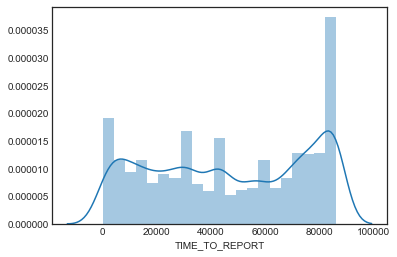

In [75]:
sns.distplot(df_rape['TIME_TO_REPORT'].dt.seconds )
# Seconds is everything less than days

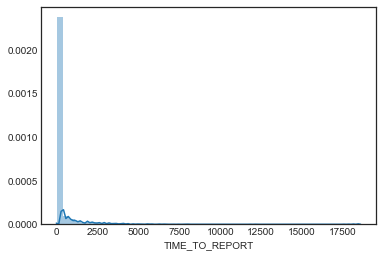

In [76]:
# Number of days until report
sns.distplot(df_rape["TIME_TO_REPORT"].dt.days )

In [77]:
df_rape['TIME_TO_REPORT'].dt.seconds.value_counts()

86340    1582
43200     832
82800     515
79200     510
3600      499
14400     494
32400     489
7200      488
75600     476
57600     464
28800     445
21600     418
72000     393
0         388
10800     384
25200     341
18000     311
54000     293
36000     289
50400     279
39600     264
68400     262
64800     238
46800     225
84600     204
1800      182
61200     176
77400     175
70200     151
5400      149
         ... 
28680       1
46860       1
61560       1
5880        1
12480       1
71160       1
78240       1
37380       1
19980       1
14460       1
71880       1
11520       1
23280       1
76320       1
80460       1
27240       1
39480       1
64020       1
23040       1
72120       1
76560       1
27480       1
35700       1
11280       1
85020       1
39240       1
27720       1
47340       1
77040       1
16560       1
Name: TIME_TO_REPORT, Length: 686, dtype: int64

In [78]:
df_rape['TIME_TO_REPORT'].value_counts()

-1 days +21:00:00     273
-1 days +22:00:00     264
-1 days +20:00:00     238
-1 days +23:00:00     209
0 days 01:00:00       182
0 days 02:00:00       170
-1 days +19:00:00     169
-1 days +23:59:00     137
0 days 04:00:00       127
-1 days +18:00:00     126
0 days 03:00:00       124
-1 days +23:30:00     119
-1 days +19:30:00     114
-1 days +21:30:00     113
-1 days +20:30:00     105
-1 days +22:30:00     101
-1 days +12:00:00      97
-1 days +18:30:00      92
0 days 00:30:00        83
0 days 05:00:00        82
-1 days +16:00:00      81
0 days 06:00:00        79
0 days 00:00:00        77
-1 days +14:00:00      76
0 days 01:30:00        73
-1 days +11:00:00      73
0 days 02:30:00        72
-1 days +10:00:00      72
-1 days +08:00:00      71
0 days 07:00:00        69
                     ... 
1169 days 12:00:00      1
-1 days +07:27:00       1
50 days 09:30:00        1
1119 days 23:59:00      1
140 days 10:00:00       1
-1 days +03:08:00       1
7 days 20:45:00         1
1 days 13:43

In [ ]:
# Convert... to seconds? minutes? days?
df_rape['TIME_TO_REPORT']

# Data Visualization

In [ ]:
# library & dataset
import seaborn as sns

In [ ]:
ax2 = sns.countplot(x='CRM_ATPT_CPTD_CD', hue='BORO_NM', data=df_rape)

In [ ]:
ax2 = sns.countplot(x='BORO_NM', hue='CRM_ATPT_CPTD_CD', data=df_rape)

In [ ]:
ax2 = sns.countplot(x='ADDR_PCT_CD', hue='CRM_ATPT_CPTD_CD', data=df_rape)

In [ ]:
# Y IS  CONTINUOUS
# X CATEGORICAL
ax = sns.violinplot(x='user_churned', y='open_count', data=df_rape, bw=0.1)

In [ ]:
df_rape_viz = np.array(pd.to_datetime(df_rape['CMPLNT_FR_DATETIME']), dtype=np.datetime64)

In [ ]:
df_rape_viz.shape

In [ ]:
type(df_rape_viz[21])

In [ ]:
# data.groupby(['col1', 'col2'])['col3'].mean()

In [ ]:
df_rape.groupby(['BORO_NM'])

In [ ]:
df_rape.groupby(['BORO_NM'])

In [ ]:
df_rape.dtypes

In [ ]:
# 77 different precincts
# Consider get_dummies with most common 
df_rape['ADDR_PCT_CD'].value_counts().count()

In [ ]:
df_rape.groupby('BORO_NM').count()

In [ ]:
# Counting everything that IS NOT NULL
df_rape.groupby(['BORO_NM','CRM_ATPT_CPTD_CD'])['CMPLNT_NUM'].count()

In [ ]:
df_rape.groupby('CRM_ATPT_CPTD_CD').count()

In [ ]:
df_rape.groupby('BORO_NM').count()

In [ ]:
# Work on attempted vs committed per borough
df_rape['BORO_NM'].value_counts()

In [ ]:
df.sort_values(by=['col1', 'col2'])

In [ ]:
df_rape.sort_values(by=['BORO_NM','CRM_ATPT_CPTD_CD'])

In [ ]:
df_rape

In [ ]:
df_rape.dtypes

In [ ]:
# Don't drop CMPLNT_NUM, it's a key!

In [79]:
df_rape = df_rape.drop(columns=['CMPLNT_FR_DT','CMPLNT_FR_TM','CMPLNT_TO_DT','CMPLNT_TO_TM'])

In [ ]:
df_rape 

In [ ]:
df_rape

In [80]:
df_model = df_rape.drop(columns=['OFNS_DESC'])

In [84]:
df_model = df_rape.drop(columns=['CMPLNT_TO_TM'])

In [85]:
df_model.columns

Index(['CMPLNT_NUM', 'RPT_DT', 'OFNS_DESC', 'PD_CD', 'CRM_ATPT_CPTD_CD',
       'BORO_NM', 'ADDR_PCT_CD', 'PREM_TYP_DESC', 'CMPLNT_FR_DATETIME',
       'CMPLNT_TO_DATETIME', 'TIME_TO_REPORT'],
      dtype='object')

In [ ]:
# Dropping this column, as the values are all the same
df_rape = df_rape.drop(columns=['CMPLNT_TO_TM'])

In [86]:
df_rape.dtypes

CMPLNT_NUM                      int64
CMPLNT_TO_TM                   object
RPT_DT                 datetime64[ns]
OFNS_DESC                      object
PD_CD                         float64
CRM_ATPT_CPTD_CD               object
BORO_NM                        object
ADDR_PCT_CD                   float64
PREM_TYP_DESC                  object
CMPLNT_FR_DATETIME     datetime64[ns]
CMPLNT_TO_DATETIME     datetime64[ns]
TIME_TO_REPORT        timedelta64[ns]
dtype: object

# Feature Creation

In [ ]:
# BUILD df_model WITH A DUMMIES DF! CHECK NULLS!

In [87]:
# DON'T DO THIS! CHECK SKLEARN DOCS, MULTI CLASS PROBLEMS
Outcome_Dummies = pd.get_dummies(df_rape['CRM_ATPT_CPTD_CD'])

In [88]:
df_rape = pd.concat([df_rape,Outcome_Dummies], axis=1)

In [ ]:
df_model = 

In [ ]:
df_rape

In [89]:
Precinct_Dummies = pd.get_dummies(df_rape['ADDR_PCT_CD'])

In [95]:
df_rape['ADDR_PCT_CD'].value_counts()

75.0     700
115.0    430
43.0     430
120.0    426
47.0     424
67.0     417
44.0     411
73.0     410
46.0     383
83.0     377
110.0    370
103.0    365
40.0     356
32.0     341
105.0    338
42.0     325
52.0     322
114.0    319
79.0     316
113.0    316
48.0     298
70.0     282
25.0     264
102.0    260
23.0     256
77.0     250
34.0     229
30.0     229
81.0     228
49.0     227
        ... 
18.0     150
14.0     146
19.0     138
24.0     131
66.0     130
63.0     129
62.0     128
61.0     128
7.0      127
10.0     123
26.0     123
6.0      119
50.0     119
122.0    115
1.0      107
68.0     106
88.0     101
17.0      99
20.0      93
94.0      87
5.0       86
100.0     79
78.0      79
112.0     77
121.0     66
76.0      65
84.0      58
111.0     53
123.0     34
22.0      25
Name: ADDR_PCT_CD, Length: 77, dtype: int64

In [90]:
Precinct_Dummies

,1.0,5.0,6.0,7.0,9.0,10.0,13.0,14.0,17.0,18.0,...,110.0,111.0,112.0,113.0,114.0,115.0,120.0,121.0,122.0,123.0
21,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
252,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
821,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1079,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1754,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2269,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2716,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
Precinct_Dummies.shape

(16610, 77)

In [92]:
sums = Precinct_Dummies.select_dtypes(pd.np.number).sum().rename('total')

In [ ]:
# Two types of features to examine here, 
# precinct activity and time dependent features
# For now, look at precincts w/ top ten values, consider percentages later

In [93]:
# I need to make a df with the first ten indices of this series
precincts_high_crime_first = sums.sort_values(ascending = False)

In [94]:
# concat to df_model
precincts_high_crime_first

75.0     700
43.0     430
115.0    430
120.0    426
47.0     424
67.0     417
44.0     411
73.0     410
46.0     383
83.0     377
110.0    370
103.0    365
40.0     356
32.0     341
105.0    338
42.0     325
52.0     322
114.0    319
79.0     316
113.0    316
48.0     298
70.0     282
25.0     264
102.0    260
23.0     256
77.0     250
34.0     229
30.0     229
81.0     228
49.0     227
        ... 
18.0     150
14.0     146
19.0     138
24.0     131
66.0     130
63.0     129
61.0     128
62.0     128
7.0      127
10.0     123
26.0     123
50.0     119
6.0      119
122.0    115
1.0      107
68.0     106
88.0     101
17.0      99
20.0      93
94.0      87
5.0       86
78.0      79
100.0     79
112.0     77
121.0     66
76.0      65
84.0      58
111.0     53
123.0     34
22.0      25
Name: total, Length: 77, dtype: int64

In [ ]:
type(sums)

In [ ]:
# pandas series in descending order to pick top precincts next... there 
# are 77 in total, not sure what I want to do w/ this, whether to make
# a feature or not

In [99]:
df_model.dtypes

CMPLNT_NUM                      int64
RPT_DT                 datetime64[ns]
OFNS_DESC                      object
PD_CD                         float64
CRM_ATPT_CPTD_CD               object
BORO_NM                        object
ADDR_PCT_CD                   float64
PREM_TYP_DESC                  object
CMPLNT_FR_DATETIME     datetime64[ns]
CMPLNT_TO_DATETIME     datetime64[ns]
TIME_TO_REPORT        timedelta64[ns]
dtype: object

In [ ]:
df_model = pd.concat([df_rape,Outcome_Dummies], axis=1)

In [ ]:
# Definitely making the borough a feature

Borough_Dummies = pd.get_dummies(df_rape['BORO_NM'])

In [100]:
df_rape

,CMPLNT_NUM,CMPLNT_TO_TM,RPT_DT,OFNS_DESC,PD_CD,CRM_ATPT_CPTD_CD,BORO_NM,ADDR_PCT_CD,PREM_TYP_DESC,CMPLNT_FR_DATETIME,CMPLNT_TO_DATETIME,TIME_TO_REPORT,ATTEMPTED,COMPLETED
21,340513307,18:00:00,2015-12-21,RAPE,155.0,COMPLETED,QUEENS,110.0,OTHER,2015-04-06 12:00:00,2015-04-10 18:00:00,258 days 12:00:00,0,1
252,198273659,10:00:00,2015-12-07,RAPE,157.0,COMPLETED,BROOKLYN,66.0,RESIDENCE - APT. HOUSE,2009-12-01 10:00:00,2010-01-01 10:00:00,2196 days 14:00:00,0,1
821,591506102,23:00:00,2015-12-31,RAPE,157.0,COMPLETED,QUEENS,102.0,RESIDENCE-HOUSE,2015-12-30 18:00:00,2015-12-30 23:00:00,0 days 06:00:00,0,1
1079,283109223,22:25:00,2015-12-31,RAPE,153.0,COMPLETED,MANHATTAN,25.0,RESIDENCE - APT. HOUSE,2015-08-01 00:01:00,2015-12-30 22:25:00,151 days 23:59:00,0,1
1754,361697946,05:19:00,2015-12-30,RAPE,157.0,COMPLETED,MANHATTAN,20.0,HOTEL/MOTEL,2015-12-30 03:04:00,2015-12-30 05:19:00,-1 days +20:56:00,0,1
2086,449252466,19:00:00,2015-12-30,RAPE,157.0,COMPLETED,BROOKLYN,70.0,RESIDENCE - APT. HOUSE,2015-12-28 18:00:00,2015-12-28 19:00:00,1 days 06:00:00,0,1
2269,841076951,NaN,2015-12-30,RAPE,153.0,COMPLETED,MANHATTAN,26.0,RESIDENCE - PUBLIC HOUSING,2015-11-27 20:00:00,NaT,32 days 04:00:00,0,1
2716,462568423,NaN,2015-12-29,RAPE,159.0,ATTEMPTED,BRONX,41.0,RESIDENCE - APT. HOUSE,2015-12-29 15:30:00,NaT,-1 days +08:30:00,1,0
3199,632341905,20:30:00,2015-12-29,RAPE,157.0,COMPLETED,QUEENS,109.0,RESIDENCE - APT. HOUSE,2015-12-28 20:00:00,2015-12-28 20:30:00,0 days 04:00:00,0,1
3346,706551270,06:00:00,2015-12-29,RAPE,155.0,COMPLETED,MANHATTAN,19.0,RESIDENCE - APT. HOUSE,2015-12-26 02:30:00,2015-12-26 06:00:00,2 days 21:30:00,0,1


In [ ]:
Borough_Dummies

In [ ]:
df_rape = pd.concat([df_rape,Borough_Dummies], axis=1)

In [ ]:
df_rape.dtypes

# Setting up Random Forest Model

In [ ]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

In [ ]:
rfc = ensemble.RandomForestClassifier()

In [ ]:
# Figure out the years for X, and get a sample of 1803 records

In [ ]:
# Need to balance X and y, find 1803 of each

df_rape['CRM_ATPT_CPTD_CD'].value_counts()

In [ ]:
attempted_rapes = df_rape.loc[df_rape['CRM_ATPT_CPTD_CD'] == 'ATTEMPTED']

In [ ]:
attempted_rapes.head()

In [ ]:
attempted_rapes_sample = attempted_rapes.sample(n=1791)

In [ ]:
attempted_rapes_sample.shape

In [ ]:
completed_rapes = df_rape.loc[df_rape['CRM_ATPT_CPTD_CD'] == 'COMPLETED']

In [ ]:
completed_rapes.shape

In [ ]:
completed_rapes_sample = completed_rapes.sample(n=1791)

In [ ]:
completed_rapes_sample.shape

In [ ]:
completed_rapes_sample.head()

In [ ]:
# Now, combine completed and attempted for the testing subset
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [ ]:
modeling_data = pd.merge(attempted_rapes, completed_rapes_sample, on='key')

In [ ]:
modeling_data.shape

In [ ]:
df_rape['CMPLNT_FR_DATETIME'].dt.year.value_counts()

In [ ]:
df_rape.isnull().sum()

In [ ]:
# I need 1803 where Completed is True, so I can create the 3606 total 
# dataset. Find out the year balance on Attempted out of curiousity

In [ ]:
y_investigation['CMPLNT_FR_DATETIME'].dt.year.value_counts()

In [ ]:
y_investigation.shape

In [ ]:
X_1803 = df_rape.sample(n=1803)

In [ ]:
X = X_1803.drop(['RPT_DT','CRM_ATPT_CPTD_CD','BORO_NM','PREM_TYP_DESC','CMPLNT_FR_DATETIME','CMPLNT_TO_DATETIME','ATTEMPTED','COMPLETED','TIME_TO_REPORT'], 1)

In [ ]:
y = X_1803['CRM_ATPT_CPTD_CD']

In [ ]:
y = df_rape['CRM_ATPT_CPTD_CD']

In [ ]:
y

In [ ]:
X.dtypes

In [ ]:
y.isnull().sum()

In [ ]:
cross_val_score(rfc, X, y, cv=5)

# Ridge Regression